In [100]:
from PIL import Image
from ultralytics import YOLO
import numpy as np

In [99]:
model = YOLO("yolov8n.pt")
# model = YOLO("yolov8n-seg.pt")

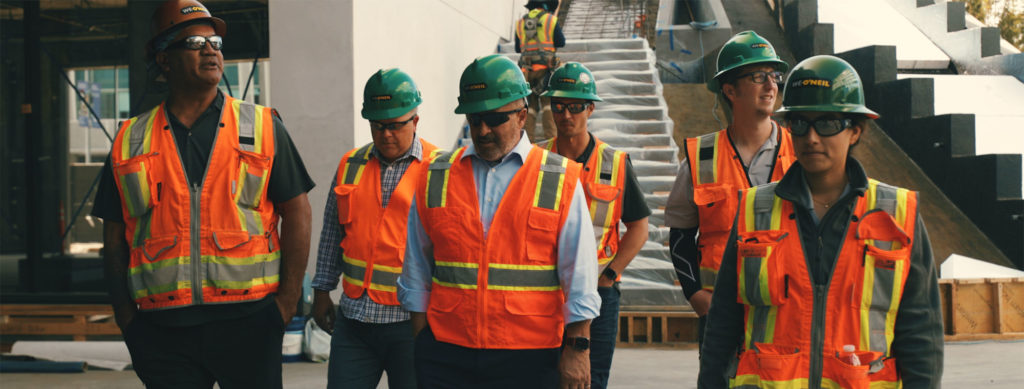

In [101]:
image = Image.open('people_test.jpg')
image

In [105]:
results = model([image], save=True)
# results = results
print(results)

boxes, masks, probs = ([], [], [])
for result in results:
    # print(result)
    boxes = result.boxes.numpy()
    masks = result.masks
    probs = result.probs

# print("Boxes")
print(boxes)
# print("Masks")
# print(masks)
# print("Probs")
# print(probs)


0: 256x640 6 persons, 135.3ms
Speed: 1.3ms pre-process, 135.3ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
type: <class 'torch.Tensor'>
shape: torch.Size([6, 6])
dtype: torch.float32
 + tensor([[9.50000e+01, 0.00000e+00, 3.15000e+02, 3.84000e+02, 9.06890e-01, 0.00000e+00],
        [3.04000e+02, 6.70000e+01, 4.38000e+02, 3.84000e+02, 8.82130e-01, 0.00000e+00],
        [7.32000e+02, 5.40000e+01, 9.45000e+02, 3.85000e+02, 8.27981e-01, 0.00000e+00],
        [4.02000e+02, 5.50000e+01, 6.14000e+02, 3.86000e+02, 8.22146e-01, 0.00000e+00],
        [6.64000e+02, 3.00000e+01, 7.98000e+02, 3.83000e+02, 8.13179e-01, 0.00000e+00],
        [5.41000e+02, 6.10000e+01, 6.52000e+02, 3.82000e+02, 6.99767e-01, 0.00000e+00]])Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Masks'> masks
type: <class 'torch.Tensor'>
shape: torch.Size([6, 256, 640])
dtype: torch.float32
 + tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ...,

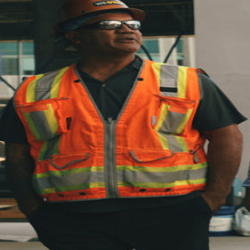

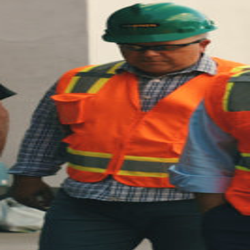

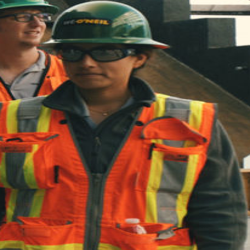

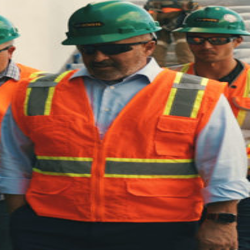

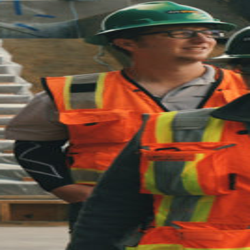

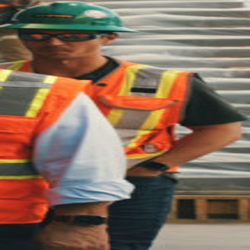

In [97]:
for bbox in boxes:
    bbox = bbox.xyxy[0].astype(int).tolist()

    cropped = image.crop(bbox)
    resized = cropped.resize((250, 250))
    display(resized)

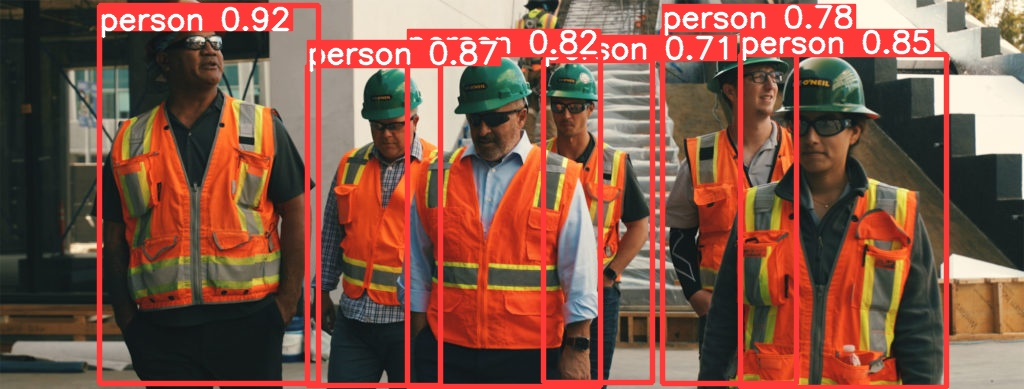

In [104]:
Image.open('runs/detect/predict/image0.jpg')
# Image.open('runs/segment/predict/image0.jpg')